# THE SPARKS FOUNDATION INTERNSHIP

# Prashant Kumar

# Prediction using Decision Tree Algorithm
Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. Dataset : https://bit.ly/3kXTdox

In [1]:
# importing libaries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data=pd.read_csv('Iris.csv')
data.head(15)
# printing data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
data.columns
# printing columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
data.describe()
# describing data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isnull().values.any()
# checking for null values

False

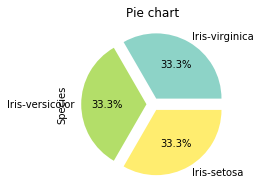

In [6]:
# representing species in the form of pie chrat
plt.figure(figsize = (7,3))
data['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=False,cmap='Set3')
plt.title('Pie chart')
plt.show()

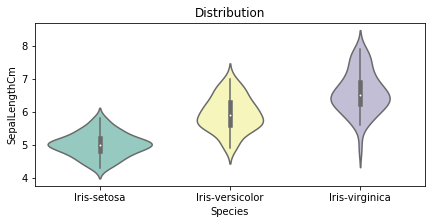

In [7]:
# representing species in form of violin chart
plt.figure(figsize = (7,3))
sns.violinplot(x='Species',y='SepalLengthCm',data=data,palette = 'Set3')
plt.title('Distribution')
plt.show()

In [8]:
# spliting data for train test and considering 20% of data for test
X_train,X_val,y_train,y_val=train_test_split(data.iloc[:,1:-1],data.iloc[:,-1],test_size=0.2,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [9]:
# creating model and training it
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_val)

In [10]:
# checking accuracy
accuracy_score(y_pred,y_val)

0.9666666666666667

In [11]:
# printing the classification report
print(classification_report(y_pred,y_val))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.97      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



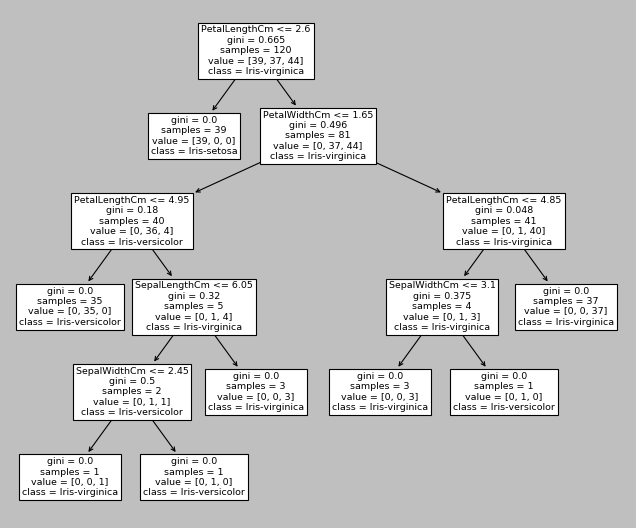

In [12]:
# plotting the tree
plt.style.use('classic')
from sklearn import tree
fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(model,
                   feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                   class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                   filled=False)

# Evaluating the model by giving some random data to predict the species

In [13]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# now to check whether our tree is working properly or not form the above lets take a sample as say index 4
# SepalLengthCm=5.0 || SepalWidthCm=3.6 || PetalLengthCm=1.4 || PetalWidthCm=0.2 
# now it should predict the Species=Iris-setosa
x=[5.0,3.6,1.4,0.2]
model.predict([x])

array(['Iris-setosa'], dtype=object)

In [15]:
# as we can see that the prediction is Iris-setosa
# which means our model is predicting accurately
#goal achieved